(9551, 21)
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
Restaurant ID           0

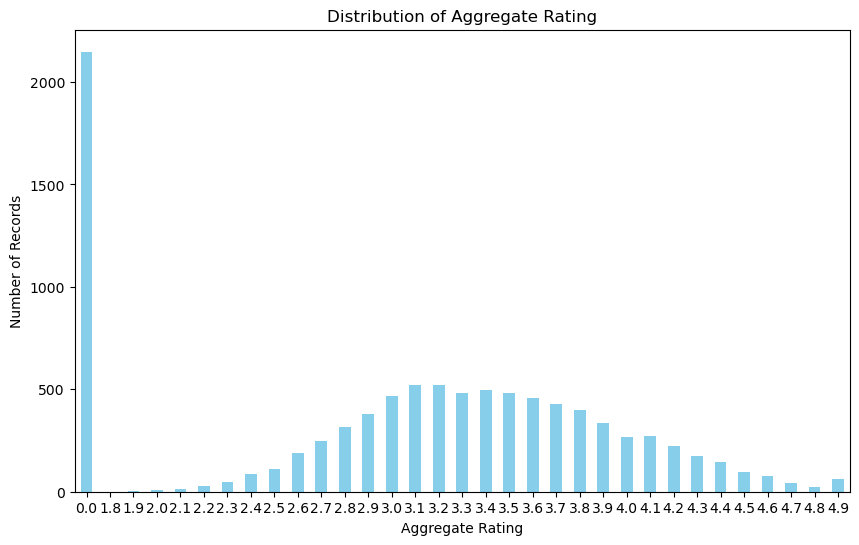

Aggregate rating
0.0    22.489792
3.2     5.465396
3.1     5.433986
3.4     5.214114
3.3     5.057062
3.5     5.025652
3.0     4.900010
3.6     4.795309
3.7     4.470736
3.8     4.188043
2.9     3.989111
3.9     3.507486
2.8     3.298084
4.1     2.868810
4.0     2.785049
2.7     2.617527
4.2     2.313894
2.6     1.999791
4.3     1.821799
4.4     1.507696
2.5     1.151712
4.5     0.994660
2.4     0.910899
4.6     0.816668
4.9     0.638677
2.3     0.492095
4.7     0.439745
2.2     0.282693
4.8     0.261753
2.1     0.157052
2.0     0.073291
1.9     0.020940
1.8     0.010470
Name: proportion, dtype: float64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Dataset  (2).csv")

print(data.shape)
print(data.columns)
print(data.isnull().sum())

data['Cuisines'] = data['Cuisines'].fillna("Not Available")

print(data.isnull().sum())
print(data.dtypes)

data['Has Table booking'] = data['Has Table booking'].apply(lambda x: True if x == 'Yes' else False)

print(data.dtypes)
print(data['Aggregate rating'].value_counts())

plt.figure(figsize=(10, 6))
data['Aggregate rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Records')
plt.xticks(rotation=0)
plt.show()

rating_percent = data['Aggregate rating'].value_counts(normalize=True) * 100
print(rating_percent)



Basic Statistical Measures:
       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              25

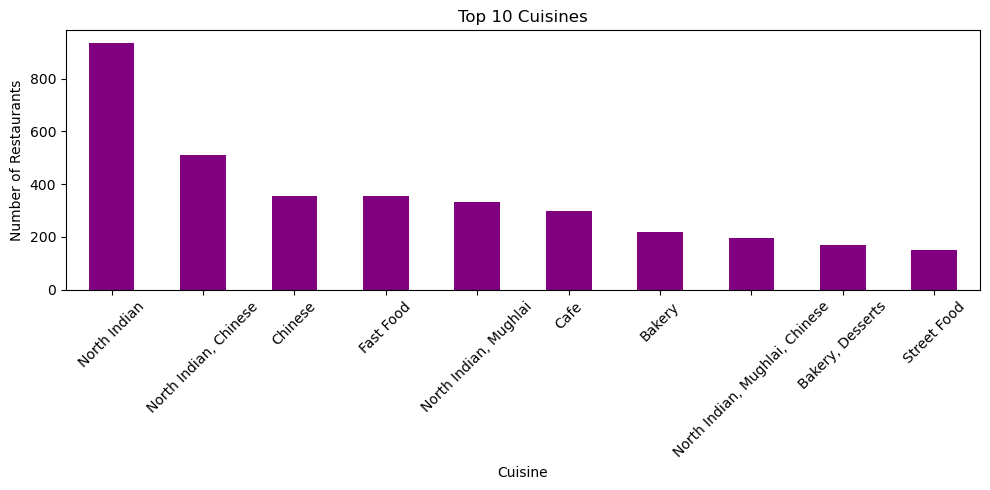

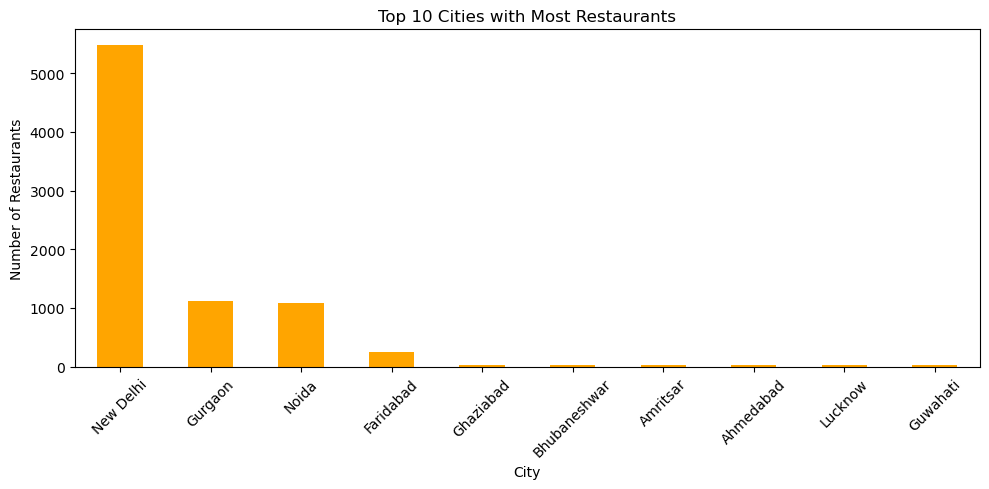

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Dataset  (2).csv")

# Basic statistical measures
print("\nBasic Statistical Measures:")
print(data.describe())

# Median and Standard Deviation
print("\nMedian values:")
print(data.median(numeric_only=True))

print("\nStandard Deviation:")
print(data.std(numeric_only=True))

# Distribution of categorical variables
print("\nCountry Code Distribution:")
print(data['Country Code'].value_counts())

print("\nCity Distribution:")
print(data['City'].value_counts())

print("\nCuisines Distribution:")
print(data['Cuisines'].value_counts().head(10))

# Top 10 cuisines
top_cuisines = data['Cuisines'].value_counts().head(10)
print("\nTop 10 Cuisines with most restaurants:")
print(top_cuisines)

# Top 10 cities
top_cities = data['City'].value_counts().head(10)
print("\nTop 10 Cities with most restaurants:")
print(top_cities)

# Plot top cuisines
plt.figure(figsize=(10, 5))
top_cuisines.plot(kind='bar', color='purple')
plt.title("Top 10 Cuisines")
plt.ylabel("Number of Restaurants")
plt.xlabel("Cuisine")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot top cities
plt.figure(figsize=(10, 5))
top_cities.plot(kind='bar', color='orange')
plt.title("Top 10 Cities with Most Restaurants")
plt.ylabel("Number of Restaurants")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


🌍 Number of Restaurants per Country Code:
Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
Name: count, dtype: int64

🏙️ Number of Restaurants per City:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64


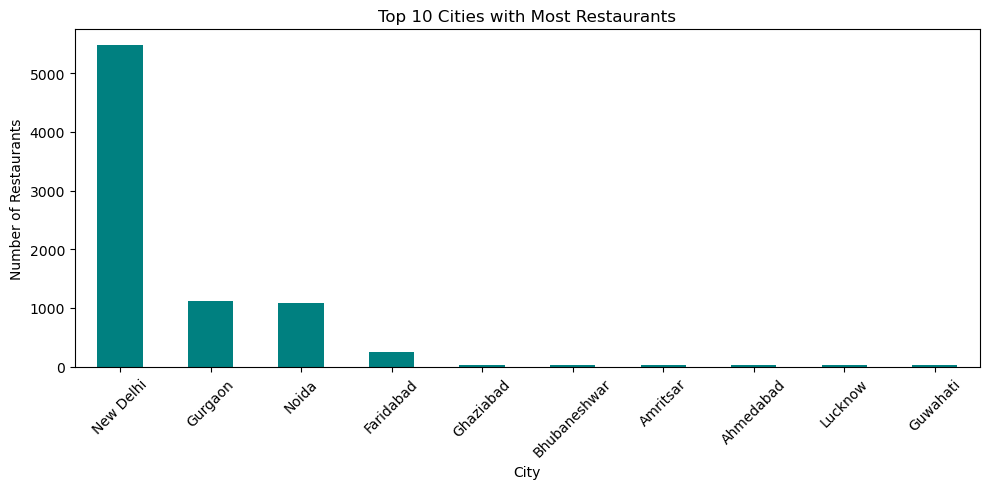

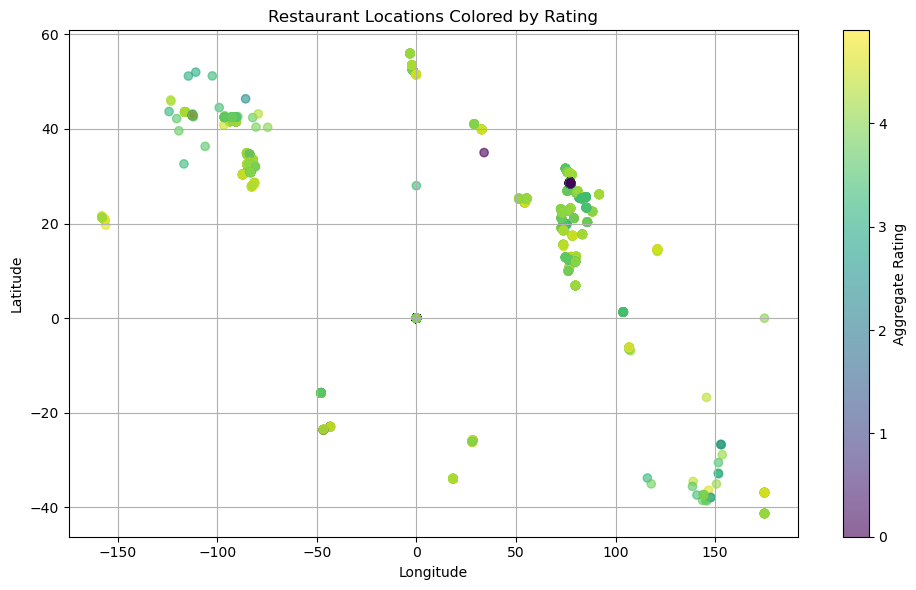


📊 Correlation Matrix:

                  Latitude  Longitude  Aggregate rating
Latitude          1.000000   0.043207          0.000516
Longitude         0.043207   1.000000         -0.116818
Aggregate rating  0.000516  -0.116818          1.000000


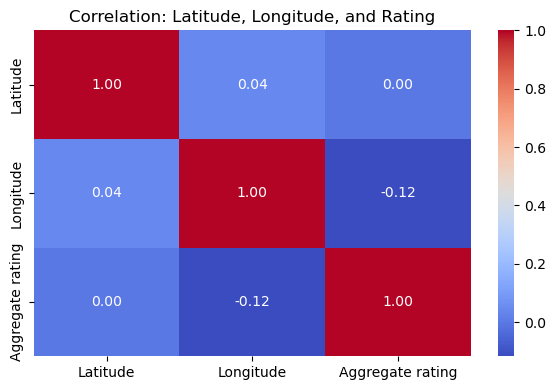

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
data = pd.read_csv("Dataset  (2).csv")

# Step 2: Clean missing values
data['Cuisines'] = data['Cuisines'].fillna("Not Available")
data = data.dropna(subset=['Latitude', 'Longitude', 'Aggregate rating'])  # drop rows with missing location or rating

# Step 3: Analyze distribution across countries
print("🌍 Number of Restaurants per Country Code:")
print(data['Country Code'].value_counts().head(10))

# Step 4: Analyze distribution across cities
print("\n🏙️ Number of Restaurants per City:")
print(data['City'].value_counts().head(10))

# Plot: Top 10 Cities with Most Restaurants
top_cities = data['City'].value_counts().head(10)
plt.figure(figsize=(10,5))
top_cities.plot(kind='bar', color='teal')
plt.title("Top 10 Cities with Most Restaurants")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 5: Visualize Restaurant Locations on a Scatter Plot (colored by rating)
plt.figure(figsize=(10,6))
scatter = plt.scatter(
    data['Longitude'], data['Latitude'],
    c=data['Aggregate rating'], cmap='viridis', alpha=0.6
)
plt.colorbar(scatter, label='Aggregate Rating')
plt.title("Restaurant Locations Colored by Rating")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6: Correlation between location and rating
correlation_data = data[['Latitude', 'Longitude', 'Aggregate rating']]
correlation_matrix = correlation_data.corr()

print("\n📊 Correlation Matrix:\n")
print(correlation_matrix)

# Step 7: Plot Correlation Matrix
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation: Latitude, Longitude, and Rating")
plt.tight_layout()
plt.show()
